# Interpretable Recurrent Neural Network Video MNIST Demo

Dataset courtesty of github user [despoisj](https://github.com/despoisj) and his/her [LatentSpaceVisualization]( https://github.com/despoisj/LatentSpaceVisualization) project.

---

# Load Data and Visualize

4


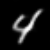

4


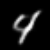

4


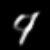

7


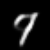

7


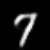

7


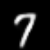

7


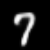

7


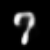

7


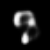

5


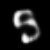

In [1]:
from IPython.display import display
import pickle
import pandas

[imgs, y] = pandas.read_pickle(open('LatentSpaceVisualization/Visuals/mnist_transitions.p', 'rb'))
for img, y_ in zip(imgs[:10], y[:10]):
    print(y_)
    display(img)

# Interactive Visualization

In [2]:
from ipywidgets import interact, fixed
import ipywidgets as widgets

@interact(imgs=fixed(imgs), y=fixed(y), i=widgets.IntSlider(min=0, max=len(y)-1, step=1))
def mnist_video(imgs, y, i):
    print(y[i])
    return imgs[i].resize(size=[128, 128])

# Vectorize Data Points

In [3]:
from keras.preprocessing.image import img_to_array
import numpy as np

X = np.array([img_to_array(img) for img in imgs]) / 255.
#X

Using TensorFlow backend.


# Flatten the Images

In [5]:
X_flat = X.reshape(6000, 50*50)
#X_flat

# Split up Into Subsequences

In [8]:
X_list = np.split(X_flat, indices_or_sections=100)
#X_list

# Make into Sequential

In [9]:
X_seq = np.zeros([100, 60, 2500])
for i, x in enumerate(X_list):
    X_seq[i] = x

# Define Keras Model

In [36]:
SimpleRNN?

In [10]:
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN

model = Sequential() # the length of the time sequence is already calculated from X_seq.
model.add(SimpleRNN(units=10, return_sequences=True, activation='softmax', input_shape=[60, 50*50]))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 60, 10)            25110     
Total params: 25,110
Trainable params: 25,110
Non-trainable params: 0
_________________________________________________________________


# Prediction

In [11]:
model.predict(X_seq[:1]).shape

(1, 60, 10)

# Preprocessing Labels

In [12]:
from keras.utils.np_utils import to_categorical

Y = to_categorical(y)
Y_list = np.split(Y, indices_or_sections=100)
#Y_list

Y_seq = np.zeros([100, 60, 10])
for i, y_ in enumerate(Y_list):
    Y_seq[i] = y_

# Define Callback

In [13]:
from keras.callbacks import Callback

class HelloWorld(Callback):
    def on_train_begin(self, logs=None):
        print('Training has begun')

    def on_epoch_end(self, epoch, logs=None):
        print('Epoch ended')

# Fit the Model

In [14]:
history = model.fit(X_seq, Y_seq, validation_split=.1, callbacks=[HelloWorld()])

Train on 90 samples, validate on 10 samples
Training has begun
Epoch 1/10
90/90 [==============================] - 0s - loss: 2.2725 - acc: 0.1598 - val_loss: 2.0814 - val_acc: 0.2817
Epoch 2/10
90/90 [==============================] - 0s - loss: 1.9865 - acc: 0.3628 - val_loss: 1.8522 - val_acc: 0.4233
Epoch 3/10
90/90 [==============================] - 0s - loss: 1.7705 - acc: 0.5030 - val_loss: 1.6536 - val_acc: 0.5533
Epoch 4/10
90/90 [==============================] - 0s - loss: 1.5881 - acc: 0.5819 - val_loss: 1.5037 - val_acc: 0.6083
Epoch 5/10
90/90 [==============================] - 0s - loss: 1.4421 - acc: 0.6365 - val_loss: 1.3988 - val_acc: 0.6283
Epoch 6/10
90/90 [==============================] - 0s - loss: 1.3301 - acc: 0.6563 - val_loss: 1.3154 - val_acc: 0.6417
Epoch 7/10
90/90 [==============================] - 0s - loss: 1.2391 - acc: 0.6674 - val_loss: 1.2478 - val_acc: 0.6550
Epoch 8/10
90/90 [==============================] - 0s - loss: 1.1676 - acc: 0.6696 - val_

# Learning Curves

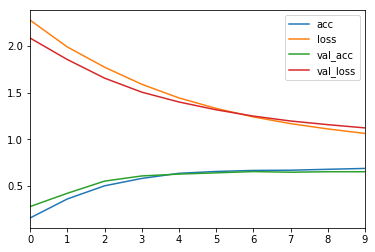

In [15]:
import pandas as pd
%matplotlib inline

pd.DataFrame(history.history).plot()

In [17]:
model.evaluate(X, Y)

ValueError: Error when checking input: expected simple_rnn_1_input to have 3 dimensions, but got array with shape (6000, 50, 50, 1)